# ANN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout

## ANN for Regression – California Housing Dataset



In this activity, we'll use a simple artificial neural network (ANN) to solve a regression problem using the California Housing dataset.

We'll learn:
- How to structure ANN for regression
- Use of activation functions like ReLU
- Loss function for regression tasks (MSE)
- Evaluation using MAE, RMSE, and R²


In [ ]:
# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Convert to DataFrame for visualization
df = pd.DataFrame(X_train, columns=data.feature_names)
df['Target'] = y_train

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,-0.326196,0.348490,-0.174916,-0.208365,0.768276,0.051376,-1.372811,1.272587,1.030
1,-0.035843,1.618118,-0.402835,-0.128530,-0.098901,-0.117362,-0.876696,0.709162,3.821
2,0.144701,-1.952710,0.088216,-0.257538,-0.449818,-0.032280,-0.460146,-0.447603,1.726
3,-1.017864,0.586545,-0.600015,-0.145156,-0.007434,0.077507,-1.382172,1.232698,0.934
4,-0.171488,1.142008,0.349007,0.086624,-0.485877,-0.068832,0.532084,-0.108551,0.965


In [ ]:
df.shape

(16512, 9)

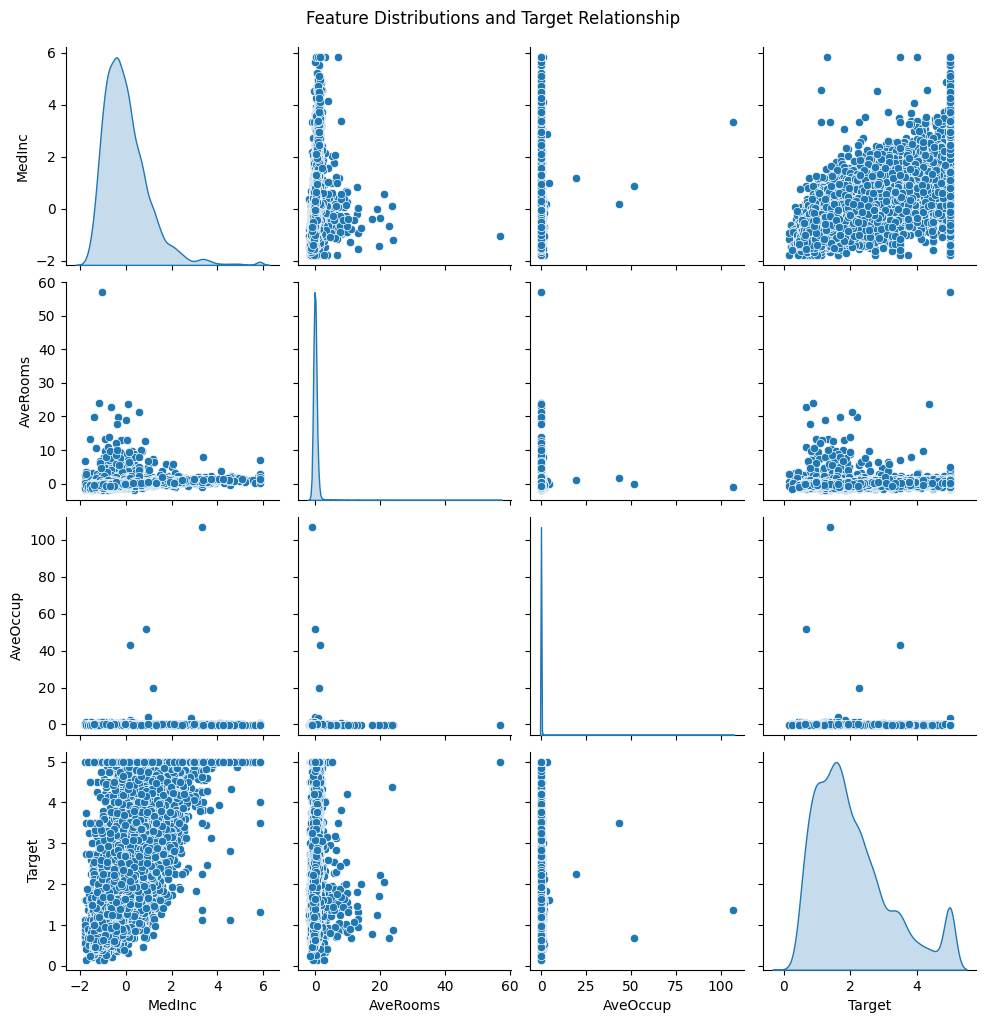

In [ ]:
# Pairplot for selected features
sns.pairplot(df[['MedInc', 'AveRooms', 'AveOccup', 'Target']], diag_kind='kde')
plt.suptitle("Feature Distributions and Target Relationship", y=1.02)
plt.show()

In [ ]:
# Build the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

413/413 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 1.6013 - mae: 0.8568 - val_loss: 0.4791 - val_mae: 0.4804


In [ ]:
# Evaluate
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.4f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2678 - mae: 0.3553
Test MAE: 0.3571


In [ ]:
# Predict and report
y_pred = model.predict(X_test).flatten()
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
R2 Score: 0.7889378360514823
RMSE: 0.525906602549436


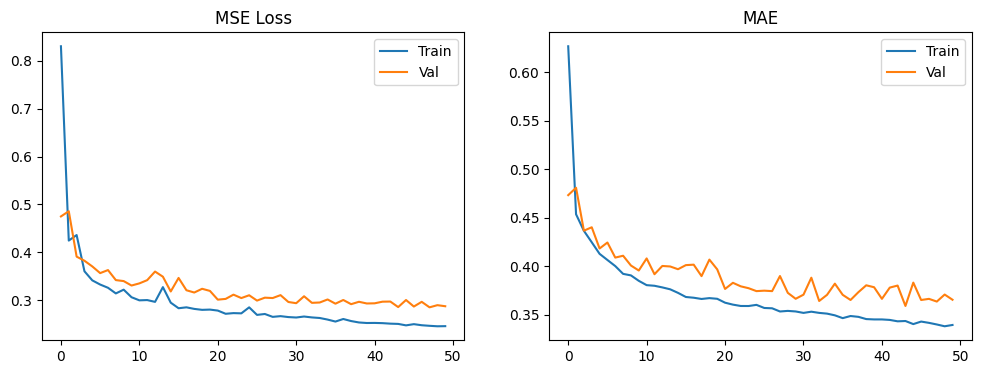

In [ ]:
# Plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('MSE Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train')
plt.plot(history.history['val_mae'], label='Val')
plt.title('MAE')
plt.legend()

plt.show()

## Binary Classification using ANN


**Dataset:** Bank Marketing Dataset (UCI)  
**Objective:** Predict if a client will subscribe to a term deposit using an Artificial Neural Network (ANN) implemented with Keras.

We'll build a multi-layer perceptron for binary classification using categorical and numerical client features.


### Step 1: Load and Explore Dataset

We load the dataset and perform basic exploratory data analysis (EDA) to understand its structure.


In [ ]:
df = pd.read_csv("/content/bank-additional-full.csv", sep=';', header=0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()
df.describe()
df['y'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,count
y,
no,36548
yes,4640


In [ ]:
# Label encode target
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Separate features and target
X = df.drop('y', axis=1)
y = df['y']

# Label encode categorical columns
cat_cols = X.select_dtypes(include='object').columns
for col in cat_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=64, verbose=1)

Epoch 1/5
412/412 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9133 - loss: 0.1911 - val_accuracy: 0.9102 - val_loss: 0.1880
Epoch 2/5
412/412 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9118 - loss: 0.1907 - val_accuracy: 0.9123 - val_loss: 0.1867
Epoch 3/5
412/412 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9102 - loss: 0.1912 - val_accuracy: 0.9123 - val_loss: 0.1870
Epoch 4/5
412/412 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9092 - loss: 0.1924 - val_accuracy: 0.9099 - val_loss: 0.1864
Epoch 5/5
412/412 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9122 - loss: 0.1889 - val_accuracy: 0.9132 - val_loss: 0.1867


In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9201 - loss: 0.1777
Test Accuracy: 0.9171


In [ ]:
# Predictions
y_prob = model.predict(X_test).flatten()
y_pred = (y_prob >= 0.5).astype(int)

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Metrics
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9357    0.9735    0.9542      7310
           1     0.6935    0.4731    0.5625       928

    accuracy                         0.9171      8238
   macro avg     0.8146    0.7233    0.7583      8238
weighted avg     0.9084    0.9171    0.9101      8238



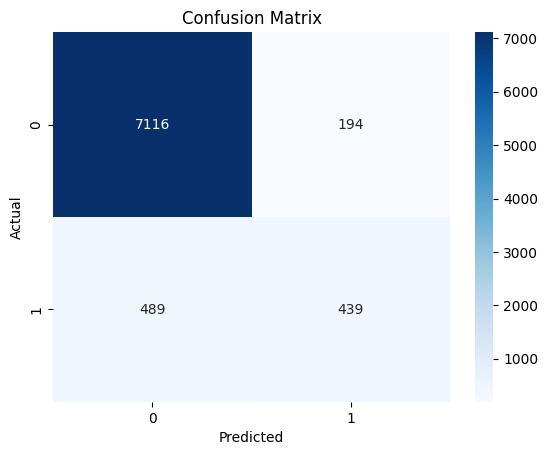

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

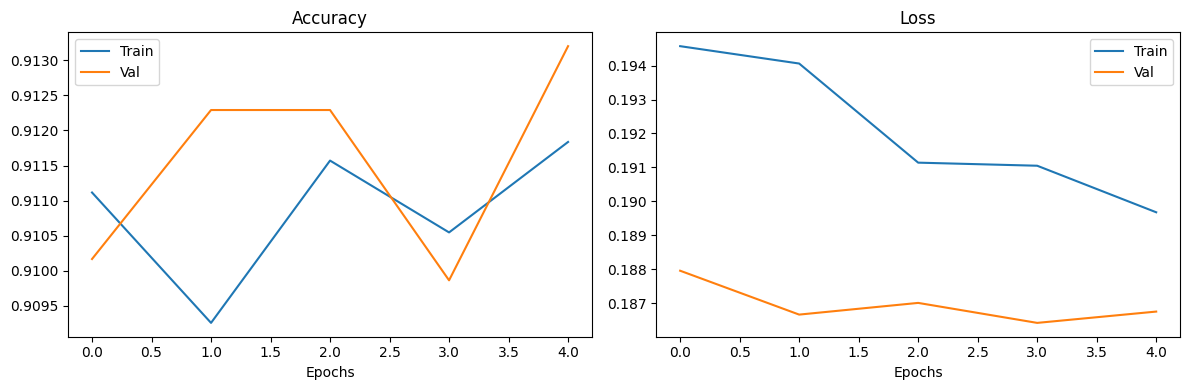

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# Multiclass Classification using ANN (Forest Cover Type Dataset)



In this activity, we will build a Multilayer Perceptron (ANN) using Keras for a multiclass classification problem.

- **Dataset**: Forest Cover Type (UCI)
- **Input Features**: 54 cartographic features
- **Target Variable**: Cover_Type (7 classes)
- **Goal**: Predict the type of forest cover based on cartographic data

We’ll build a multi-layer ANN with ReLU activations and Softmax output to handle multiclass predictions.


In [ ]:
from sklearn.datasets import fetch_covtype

# Load dataset
data = fetch_covtype(as_frame=True)
X, y = data.data, data.target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

y_train -= 1
y_test -= 1

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Shape of X_train: {X_train.shape}")
print(f"Unique classes in target: {pd.Series(y_train).nunique()}")

Shape of X_train: (464809, 54)
Unique classes in target: 7


In [ ]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,751 (61.53 KB)

 Trainable params: 15,751 (61.53 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=1024)

Epoch 1/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.6548 - loss: 0.8670 - val_accuracy: 0.7567 - val_loss: 0.5719
Epoch 2/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7640 - loss: 0.5535 - val_accuracy: 0.7820 - val_loss: 0.5195
Epoch 3/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7830 - loss: 0.5098 - val_accuracy: 0.7900 - val_loss: 0.4922
Epoch 4/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7971 - loss: 0.4776 - val_accuracy: 0.8062 - val_loss: 0.4636
Epoch 5/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8079 - loss: 0.4551 - val_accuracy: 0.8145 - val_loss: 0.4455
Epoch 6/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8159 - loss: 0.4363 - val_accuracy: 0.8213 - val_loss: 0.4299
Epoch 7/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8250 - loss: 0.4182 - val_accuracy: 0.8285 - val_loss: 0.4146
Epoch 8/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8293 - loss: 0.4088 - val_accuracy: 0

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.8962


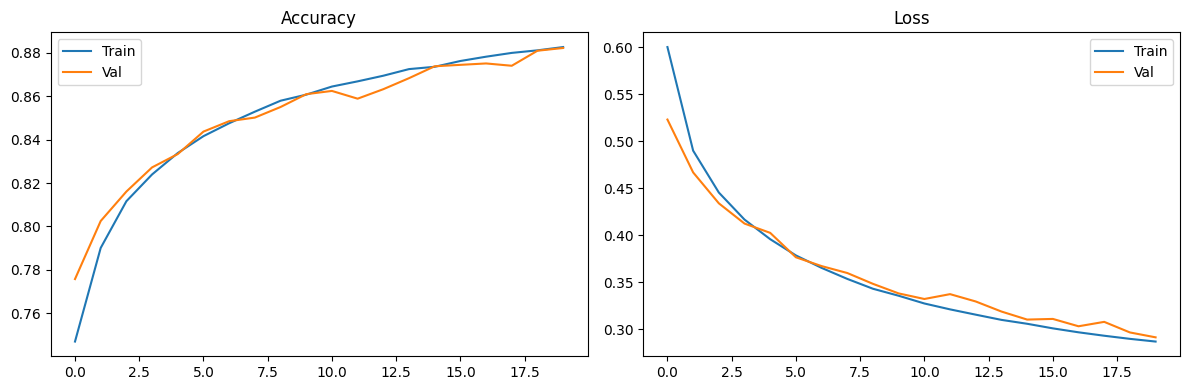

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("Loss")
plt.legend()

plt.tight_layout()
plt.show()

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.86      0.88     42368
           1       0.89      0.91      0.90     56661
           2       0.85      0.90      0.87      7151
           3       0.88      0.66      0.75       549
           4       0.74      0.61      0.67      1899
           5       0.79      0.68      0.73      3473
           6       0.91      0.90      0.90      4102

    accuracy                           0.88    116203
   macro avg       0.85      0.79      0.82    116203
weighted avg       0.88      0.88      0.88    116203



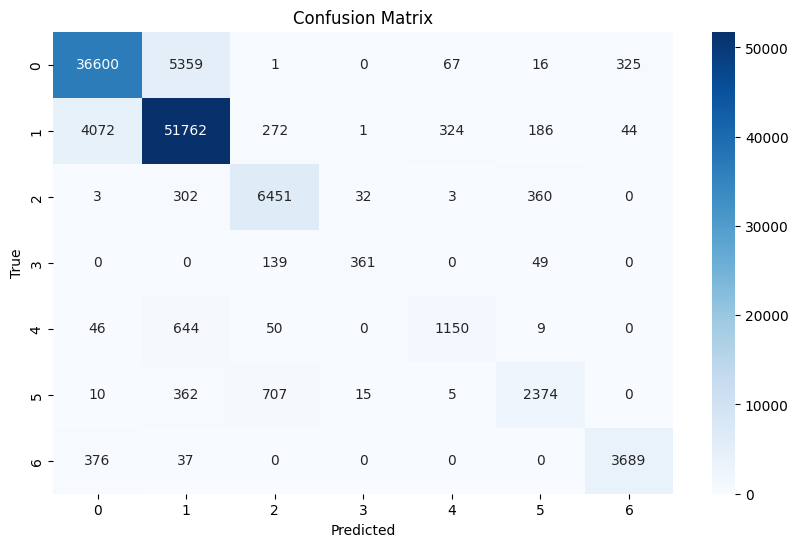

In [ ]:
y_pred = model.predict(X_test)
y_classes = y_pred.argmax(axis=1)  # adjust to 1-based class labels

print(classification_report(y_test, y_classes))

# Confusion matrix
cm = confusion_matrix(y_test, y_classes)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 1
